# Load data

In [30]:
# from asammdf import MDF
# import plotly.graph_objects as go

# mdf = MDF('data/input/8h-run.mf4')
# # features = [
# #     'EM1_PH_ANGLE',      
# #     'EM1_I_DCLINK',
# #     # 'EM1_U_DCLINK',
# #     'EM1_T_IGBT',
# #     'EM1_INV_T_W_I',
# #     'EM1_INV_T_W_O',    
# #     'EM1_T_W_I',
# #     'EM1_T_ROT_AVG',
# #     'EM1_T_W_O'
# #     ]
# features = [
#     'T_0',                  # ambient temperature
#     'EM1_T_W_O',             # water outlet temperature
#     'EM1_UD',               # U_D
#     'EM1_UQ',               # U_Q
#     'n',
#     'EM1_D_ID',             # I_D
#     'EM1_D_IQ',             # I_Q
#     'EM1_T_ROT_AVG'        # rotor temperature
#     # 'EM1_T_W_I',            # water inlet temperature
#     ]


# df_unfiltered = mdf.to_dataframe()
# mdf_filtered = mdf.filter(features)
# df = mdf_filtered.to_dataframe()
# df_normalized = (df - df.min()) / (df.max() - df.min())

# fig = go.Figure()
# for feature in features:
#     fig.add_trace(go.Scatter(x=df.index, y=df[feature], mode='lines', name=feature))

# fig.show()

# Rename and save

In [31]:
# import numpy as np


# Input_param_names = ['ambient',
#                     'coolant',
#                     'u_d',
#                     'u_q',
#                     'motor_speed',
#                     # 'torque',
#                     'i_d',
#                     'i_q'
#                     ]
# Target_param_names = 'pm'
# column_names = Input_param_names + [Target_param_names]
# mapping = {feature: name for feature, name in zip(features, column_names)}
# df = df.rename(columns=mapping)
# # df.insert(0, 'stator_winding', np.nan)
# # df.insert(0, 'torque', np.nan)
# # df.insert(0, 'stator_tooth', np.nan)
# # df.insert(0, 'stator_yoke', np.nan)
# # df.insert(9, 'profile_id', np.nan)

# df.to_csv(file_path, index=False)


# Load Data

In [32]:
from preprocessing.data import LightDataManager

file_path = 'data/input/test_run.csv'
dm = LightDataManager(file_path)
dm.featurize()

build dataset ..


11.36386489868164 MB
took 0.672 seconds


# Load model

In [33]:
from keras.models import model_from_json
from preprocessing.cnn_model_utils import build_cnn_model, CNNKerasRegressor

model_arch_path = 'data/output/e3eec3_arch.json'
model_weights_path = 'data/output/e3eec3_weights.h5'

def dummy_build_fn():
    # Load the model architecture from the JSON file
    with open('path_to_your_model.json', 'r') as json_file:
        model_json = json_file.read()
    model = model_from_json(json_string=model_json)
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = CNNKerasRegressor(build_fn=dummy_build_fn)
model.load_pretrained_model(model_arch_path, model_weights_path)

In [34]:
import preprocessing.config as cfg

# remove batch_size from dict, as it is not needed for build function
# batch_size = cfg.keras_cfg['cnn_params'].pop('batch_size')
# window_size = cfg.keras_cfg['window_size']

predict_cfg = {'batch_size': 128,
                'window_size': 32,
                'p_id_col': dm.PROFILE_ID_COL}

# predict
x_tst = dm.tst_df[dm.x_cols + [dm.PROFILE_ID_COL]]
y_tst = dm.tst_df[dm.y_cols]

pred = model.predict(x_tst, **predict_cfg)

pred = dm.inverse_transform(pred)
y_tst = dm.inverse_transform(y_tst)

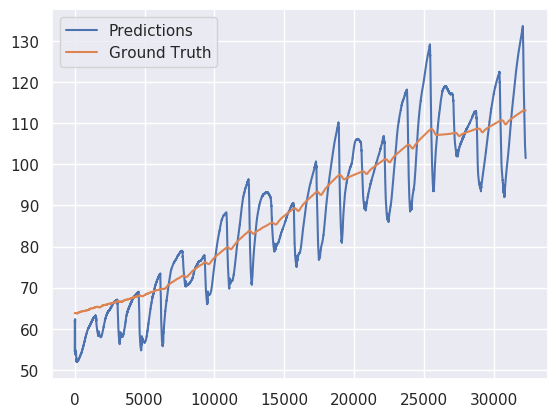

In [35]:
# Plot predictions vs ground truth
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.plot(pred, label='Predictions')
plt.plot(y_tst, label='Ground Truth')
plt.legend()
plt.show()

